1. Make seeping function work with intervals startinf in a  number $\neq 0$ $\checkmark$.
2. Make that function work for $n=0$, combining it with Pul $\checkmark$.
3. Modify then that funciton to act on the pulse list given the condition of Sweep time.  $\checkmark$.
4. Search and correct the bugs. $\checkmark$
5. Implement Sweeping with Duration. $\checkmark$
6. Calculate the number of points given by the sweeping rite and total time  $N=$ sweeping rate $* T$
7. Leave the timestep as a parameter $\checkmark$
8. Returning the time array $\checkmark$
9. Mergin functions $\checkmark$
10. Putting all into class
11. add units V:mv , t: s $\checkmark$
12. Animate pulse sequence.


Here we import the sweeping functions from the Sweeping Module

In [1]:
%matplotlib inline 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
#Importing the functions from the module
from Sweeping import sweep0, Sweep

In [3]:
import visa
rm = visa.ResourceManager()
print(rm.list_resources())

()


## Pulses

Time is given in seconds, Amplitude is Voltage in milivolts.

In [7]:
Rabi={
    'Amplitude':10,
    'Start time':1e-10,
    'End time':2e-10,
    'Start Duration':5,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [8]:
Probe0={
    'Amplitude':2 ,
    'Start time':5,
    'End time':35,
    'Start Duration':3,
    'End Duration':8,
    'Sweep time':0,
    'Sweep Duration':1
}

In [9]:
Probe1={
    'Amplitude':2,
    'Start time':0,
    'End time':20,
    'Start Duration':7,
    'End Duration':9 ,
    'Sweep time':1,
    'Sweep Duration':0
}

In [10]:
Probe2={
    'Amplitude':6,
    'Start time':10,
    'End time':21,
    'Start Duration':4,
    'End Duration':9,
    'Sweep time':1,
    'Sweep Duration':1
}

In [11]:
Probe3={
    'Amplitude':5,
    'Start time':5,
    'End time':10,
    'Start Duration':1,
    'End Duration':5,
    'Sweep time':1,
    'Sweep Duration':0
}

In [12]:
PulsoG={
    'Amplitude':6,
    'Start time':0,
    'End time':9,
    'Start Duration':2,
    'End Duration':6 ,
    'Sweep time':1,
    'Sweep Duration':1
}

In [13]:
PulsoH={
    'Amplitude':6,
    'Start time':4,
    'End time':9,
    'Start Duration':3,
    'End Duration':5,
    'Sweep time':1,
    'Sweep Duration':1
}

## Pulse schemes = Lists of the dictionaries

In [14]:
Pulses_List3 = [
    Rabi, Probe1, Probe2
    ];


Pulses_List = [
    Rabi,Probe1
    ]  ;



Pulses_List2 = [
    Rabi,Probe2
    ];

PScheme=[
    Rabi,Probe0
    ]

## Testing

In [15]:
#Pulse List_2

pobos0,trog1 = Sweep(Pulses_List2,100,0,31,1000); #Starting point
pobos50, trog1 = Sweep(Pulses_List2,100,50,31,1000); #Midle Point
pobos100, trog1 = Sweep(Pulses_List2,100,100,31,1000); #End Point

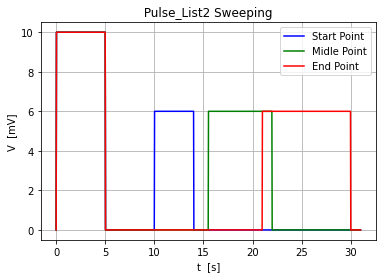

In [16]:

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog1,pobos0,'-b',label='Start Point')#blue  = start
plt.plot(trog1,pobos50,'-g',label='Midle Point') #green = mittel
plt.plot(trog1,pobos100,'-r',label='End Point') #red = end
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Pulse_List2 Sweeping ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [13]:
Pulses_List2

[{'Amplitude': 10,
  'Start time': 1e-10,
  'End time': 2e-10,
  'Start Duration': 5,
  'End Duration': 6,
  'Sweep time': 0,
  'Sweep Duration': 0},
 {'Amplitude': 6,
  'Start time': 10,
  'End time': 21,
  'Start Duration': 4,
  'End Duration': 9,
  'Sweep time': 1,
  'Sweep Duration': 1}]

### Animation

In [19]:
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-5, 55), ylim=(0, 20))
ax.grid(True)
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = t
    y = Sweep(Pulses_List2,100,100,(x - 0.01 * i),1000)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30, blit=True)
plt.plot(t, P_ani, '-g')
plt.show()

NameError: name 't' is not defined